In [9]:
from pathlib import Path
import sys

NOTEBOOK_DIR = Path.cwd().resolve()
PROJECT_ROOT = NOTEBOOK_DIR.parents[2]
sys.path.append(str(PROJECT_ROOT)) if str(PROJECT_ROOT) not in sys.path else None

print(f'Notebook directory : {NOTEBOOK_DIR}')
print(f'Project root       : {PROJECT_ROOT}')


Notebook directory : /Users/ridomaulana/bpjs/ml/training/notebooks
Project root       : /Users/ridomaulana/bpjs


In [10]:
from ml.common.data_access import DataLoader

config_path = PROJECT_ROOT / 'pipelines/claims_normalized/config.yaml'
duckdb_path = PROJECT_ROOT / 'instance/analytics.duckdb'

loader = DataLoader(
    duckdb_path=str(duckdb_path),
    config_path=config_path,
)
df = loader.load_claims_normalized()

print(f'Muat {len(df):,} baris dari {duckdb_path}')
display(df.head())


Muat 1,176,438 baris dari /Users/ridomaulana/bpjs/instance/analytics.duckdb


,claim_id,facility_code,admit_dt,discharge_dt,los,province_code,district_code,facility_ownership_code,facility_type_code,facility_class_code,...,facility_name,facility_match_quality,bpjs_payment_ratio,peer_key,peer_mean,peer_p90,peer_std,cost_zscore,ruleset_version,duplicate_pattern
0,81870922V001079,3325,2022-09-27,2022-09-27,0,33,3325,3,1,4,...,RS UMUM DAERAH BATANG,exact,1.0,Z09|ringan|RS Kelas D|JAWA TENGAH,199275.000000,210840.937617,83397.643032,-0.276686,RULESET_v1,False
1,81870922V001096,3325,2022-09-27,2022-09-27,0,33,3325,3,1,4,...,RS UMUM DAERAH BATANG,exact,1.0,Z09|ringan|RS Kelas D|JAWA TENGAH,199275.000000,210840.937617,83397.643032,-0.276686,RULESET_v1,False
2,81871022V000071,3325,2022-10-04,2022-10-04,0,33,3325,3,1,4,...,RS UMUM DAERAH BATANG,exact,1.0,Z09|ringan|RS Kelas D|JAWA TENGAH,199275.000000,210840.937617,83397.643032,0.842050,RULESET_v1,False
3,81871022V000077,3325,2022-10-04,2022-10-04,0,33,3325,3,1,4,...,RS UMUM DAERAH BATANG,exact,1.0,Z71|ringan|RS Kelas D|JAWA TENGAH,142470.873786,178700.000000,45478.612558,-0.456717,RULESET_v1,False
4,81871022V000082,3325,2022-10-04,2022-10-04,0,33,3325,3,1,4,...,RS UMUM DAERAH BATANG,exact,1.0,Z71|ringan|RS Kelas D|JAWA TENGAH,142470.873786,178700.000000,45478.612558,-0.456717,RULESET_v1,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176438 entries, 0 to 1176437
Data columns (total 53 columns):
 #   Column                       Non-Null Count    Dtype                       
---  ------                       --------------    -----                       
 0   claim_id                     1176438 non-null  object                      
 1   facility_code                1176438 non-null  object                      
 2   admit_dt                     1176438 non-null  datetime64[us]              
 3   discharge_dt                 1176438 non-null  datetime64[us]              
 4   los                          1176438 non-null  int64                       
 5   province_code                1176438 non-null  int32                       
 6   district_code                1176438 non-null  int32                       
 7   facility_ownership_code      1176438 non-null  int32                       
 8   facility_type_code           1176438 non-null  int32                    

In [12]:
df.shape

(1176438, 53)

In [13]:
df.describe()

,admit_dt,discharge_dt,los,province_code,district_code,facility_ownership_code,facility_type_code,facility_class_code,service_level_code,poli_type_code,...,severity_code,amount_claimed,amount_paid,amount_gap,comorbidity_count,bpjs_payment_ratio,peer_mean,peer_p90,peer_std,cost_zscore
count,1176438,1176438,1.176438e+06,1.176438e+06,1.176438e+06,1.176438e+06,1.176438e+06,1.176438e+06,1.176438e+06,1.176438e+06,...,1.176438e+06,1.176438e+06,1.176438e+06,1.176438e+06,918866.0,1.176438e+06,1.176438e+06,1.176438e+06,1.176438e+06,1.051208e+06
mean,2022-07-12 21:05:50.373585,2022-07-13 06:40:41.029617,3.991974e-01,3.725166e+01,3.765611e+03,6.339162e+00,1.026869e+00,6.445982e+00,1.116559e+00,1.256899e+02,...,1.150140e+00,8.676790e+05,8.665683e+05,1.110634e+03,1.378882,9.998385e-01,8.676790e+05,1.098995e+06,3.250199e+05,-1.297785e-17
min,2021-04-20 00:00:00,2022-01-01 00:00:00,0.000000e+00,1.100000e+01,1.101000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,6.940000e+04,0.000000e+00,0.000000e+00,1.0,0.000000e+00,7.470000e+04,7.470000e+04,0.000000e+00,-5.321654e+01
25%,2022-04-12 00:00:00,2022-04-13 00:00:00,0.000000e+00,3.100000e+01,3.175000e+03,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,...,1.000000e+00,1.839000e+05,1.839000e+05,0.000000e+00,1.0,1.000000e+00,2.080197e+05,2.106000e+05,3.826356e+04,-2.634199e-01
50%,2022-07-20 00:00:00,2022-07-21 00:00:00,0.000000e+00,3.300000e+01,3.324000e+03,9.000000e+00,1.000000e+00,7.000000e+00,1.000000e+00,7.000000e+00,...,1.000000e+00,1.921000e+05,1.921000e+05,0.000000e+00,1.0,1.000000e+00,2.307025e+05,2.865627e+05,2.091666e+05,-1.407993e-01
75%,2022-10-13 00:00:00,2022-10-13 00:00:00,0.000000e+00,3.600000e+01,3.673000e+03,9.000000e+00,1.000000e+00,7.000000e+00,1.000000e+00,1.500000e+01,...,1.000000e+00,3.805000e+05,3.805000e+05,0.000000e+00,2.0,1.000000e+00,4.084400e+05,5.981789e+05,3.347208e+05,-1.757539e-02
max,2022-12-31 00:00:00,2022-12-31 00:00:00,3.140000e+02,9.400000e+01,9.471000e+03,9.000000e+00,2.000000e+00,9.900000e+01,2.000000e+00,9.980000e+02,...,4.000000e+00,3.969334e+08,3.969334e+08,5.148945e+07,20.0,1.000000e+00,2.076757e+08,3.969334e+08,1.894082e+08,5.164796e+01
std,NaN,NaN,1.734366e+00,1.837795e+01,1.836572e+03,3.103290e+00,1.617013e-01,6.680723e+00,3.208948e-01,3.173922e+02,...,4.557196e-01,2.830679e+06,2.825588e+06,1.217576e+05,0.751761,8.084823e-03,2.581120e+06,3.678057e+06,1.115762e+06,1.000000e+00


In [14]:
df.isnull().sum()

claim_id                            0
facility_code                       0
admit_dt                            0
discharge_dt                        0
los                                 0
province_code                       0
district_code                       0
facility_ownership_code             0
facility_type_code                  0
facility_class_code                 0
service_level_code                  0
poli_type_code                      0
participant_segment_code            0
severity_code                       0
dx_primary_code                     0
dx_primary_label                    0
dx_primary_group                    0
procedure_code                      0
procedure_label                     0
amount_claimed                      0
amount_paid                         0
amount_gap                          0
patient_id_hash                     0
family_id_hash                      0
patient_key                         0
family_key                          0
claim_weight

In [15]:
# Calculate the number of rows with any missing values
rows_with_missing_values = df.isnull().any(axis=1).sum()
print(f"Number of rows with missing values: {rows_with_missing_values}")

Number of rows with missing values: 350466


In [16]:
import numpy as np
def _to_hashable(value):
    if isinstance(value, (list, np.ndarray)):
        return tuple(sorted(value))
    return value

df = df.copy()
df["dx_secondary_codes"] = df["dx_secondary_codes"].apply(_to_hashable)
df["dx_secondary_labels"] = df["dx_secondary_labels"].apply(_to_hashable)

dup_count = df.duplicated().sum()
print(dup_count)

0


# Eksplorasi Data Analis

Number of rows identified as potential outliers: 795288


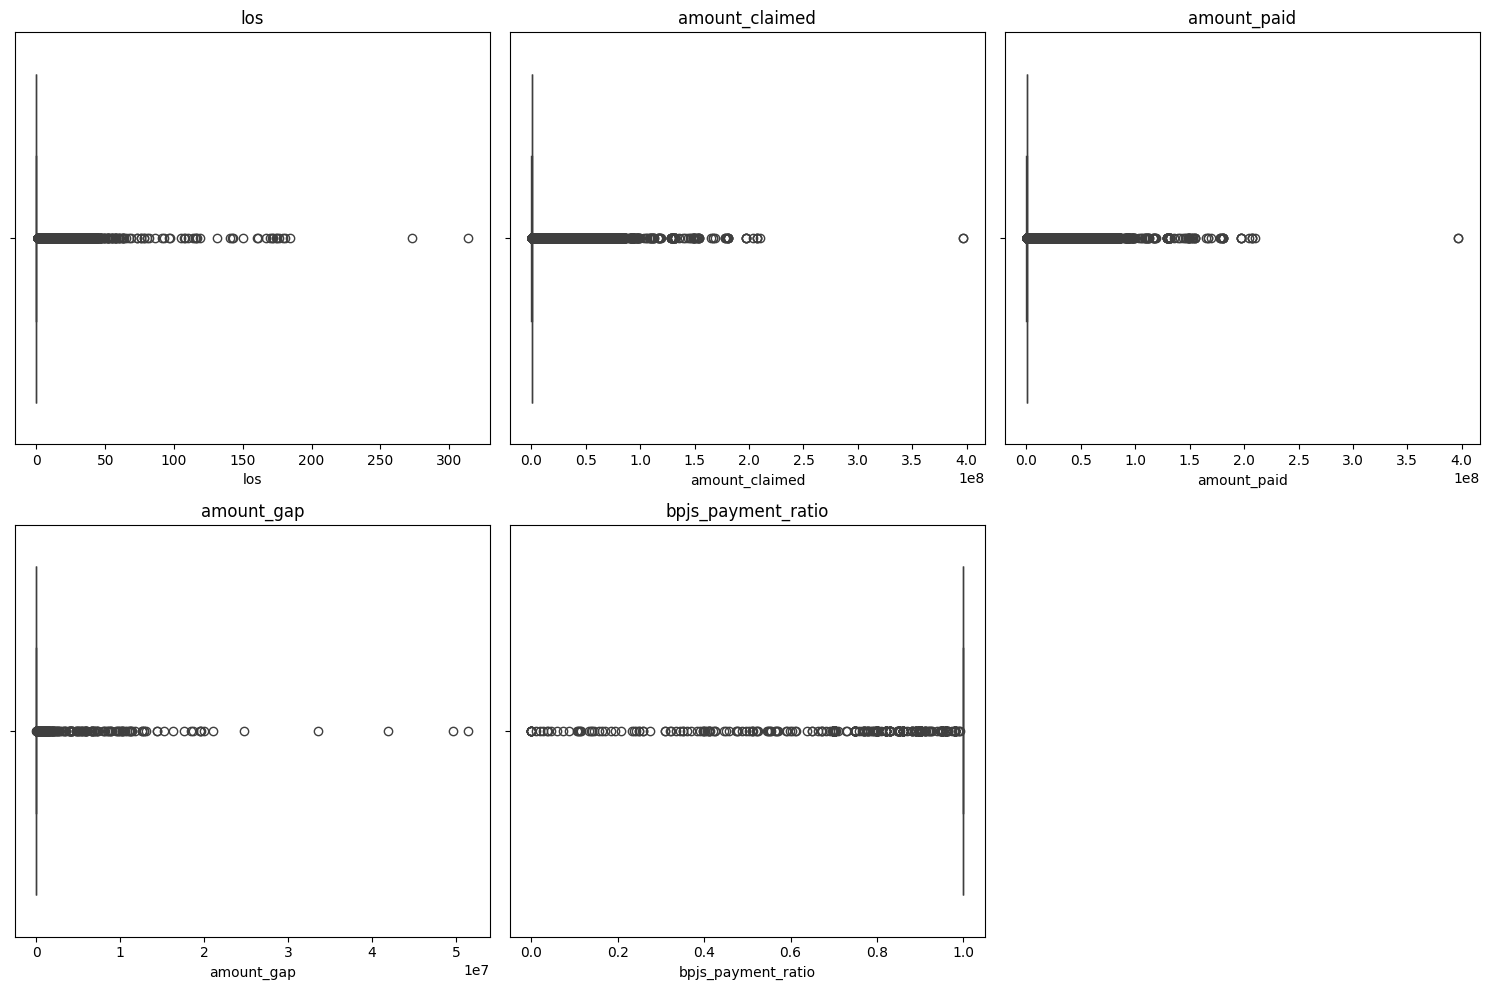

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate the IQR for each numerical column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[~((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)]

print(f"Number of rows identified as potential outliers: {len(outliers)}")

# Select a few numerical columns for visualization
cols_to_plot = ['los', 'amount_claimed', 'amount_paid', 'amount_gap', 'bpjs_payment_ratio']

# Create boxplots for the selected numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [18]:
# Display the count of each unique value in the 'los' column without truncation
import pandas as pd
pd.set_option('display.max_rows', None)
los_value_counts = df['los'].value_counts().sort_index()
print("Count of each unique value in 'los' column:")
print(los_value_counts)
pd.reset_option('display.max_rows') # Reset option after displaying

Count of each unique value in 'los' column:
los
0      1041579
1        21390
2        38184
3        31351
4        17651
5         9594
6         5494
7         3298
8         1950
9         1315
10         979
11         708
12         513
13         389
14         313
15         242
16         180
17         194
18         169
19         112
20         123
21          81
22          71
23          64
24          45
25          49
26          31
27          33
28          31
29          28
30          20
31          22
32          13
33          15
34          17
35          19
36           8
37          11
38           9
39           9
40          14
41          11
42           7
43           5
44           7
45           6
46           4
47           4
48           1
49           3
50           1
51           2
52           3
53           2
54           1
55           3
56           1
57           3
58           3
59           1
60           2
61           1
62           1
63     

In [19]:
df["dx_secondary_codes"].head()

0    (E119,)
1    (F412,)
2    (K040,)
3    (F205,)
4    (F411,)
Name: dx_secondary_codes, dtype: object

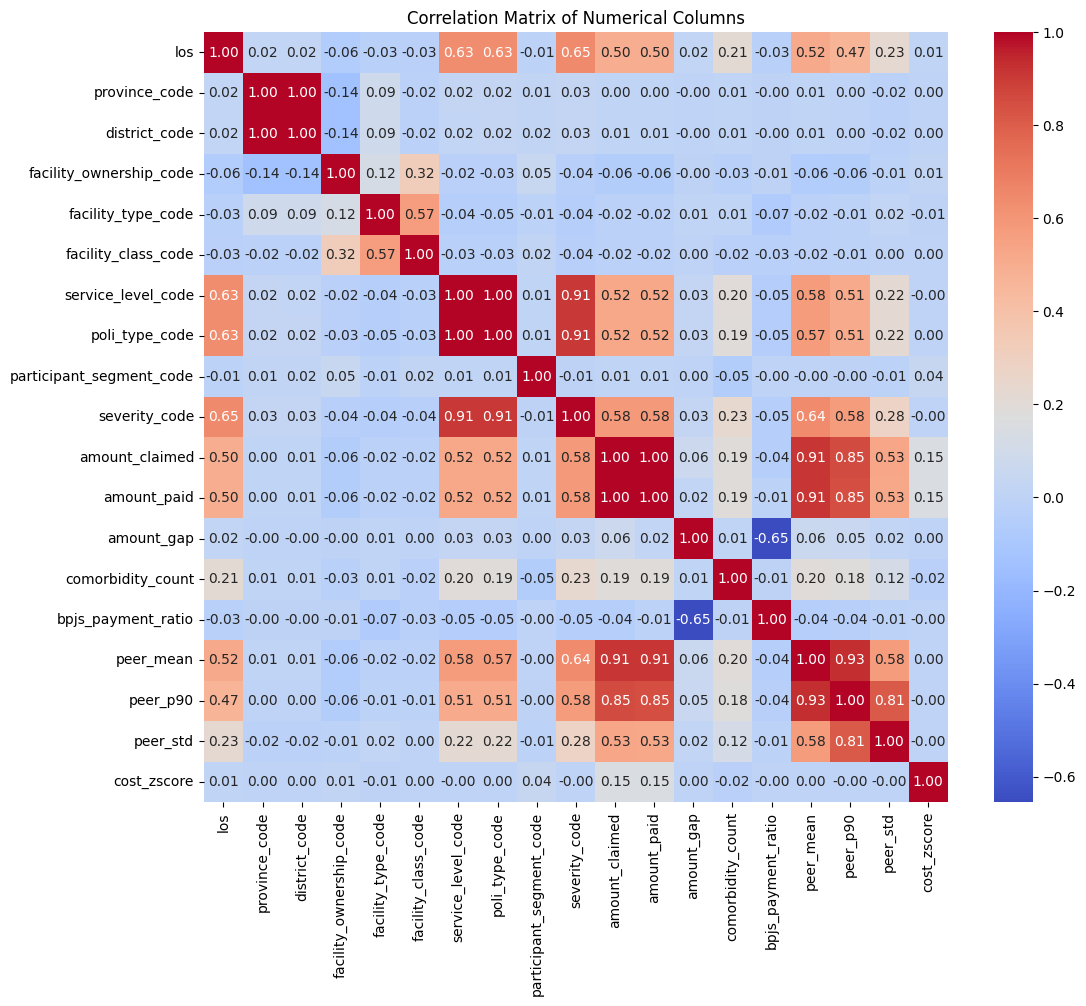

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical columns in the cleaned DataFrame
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

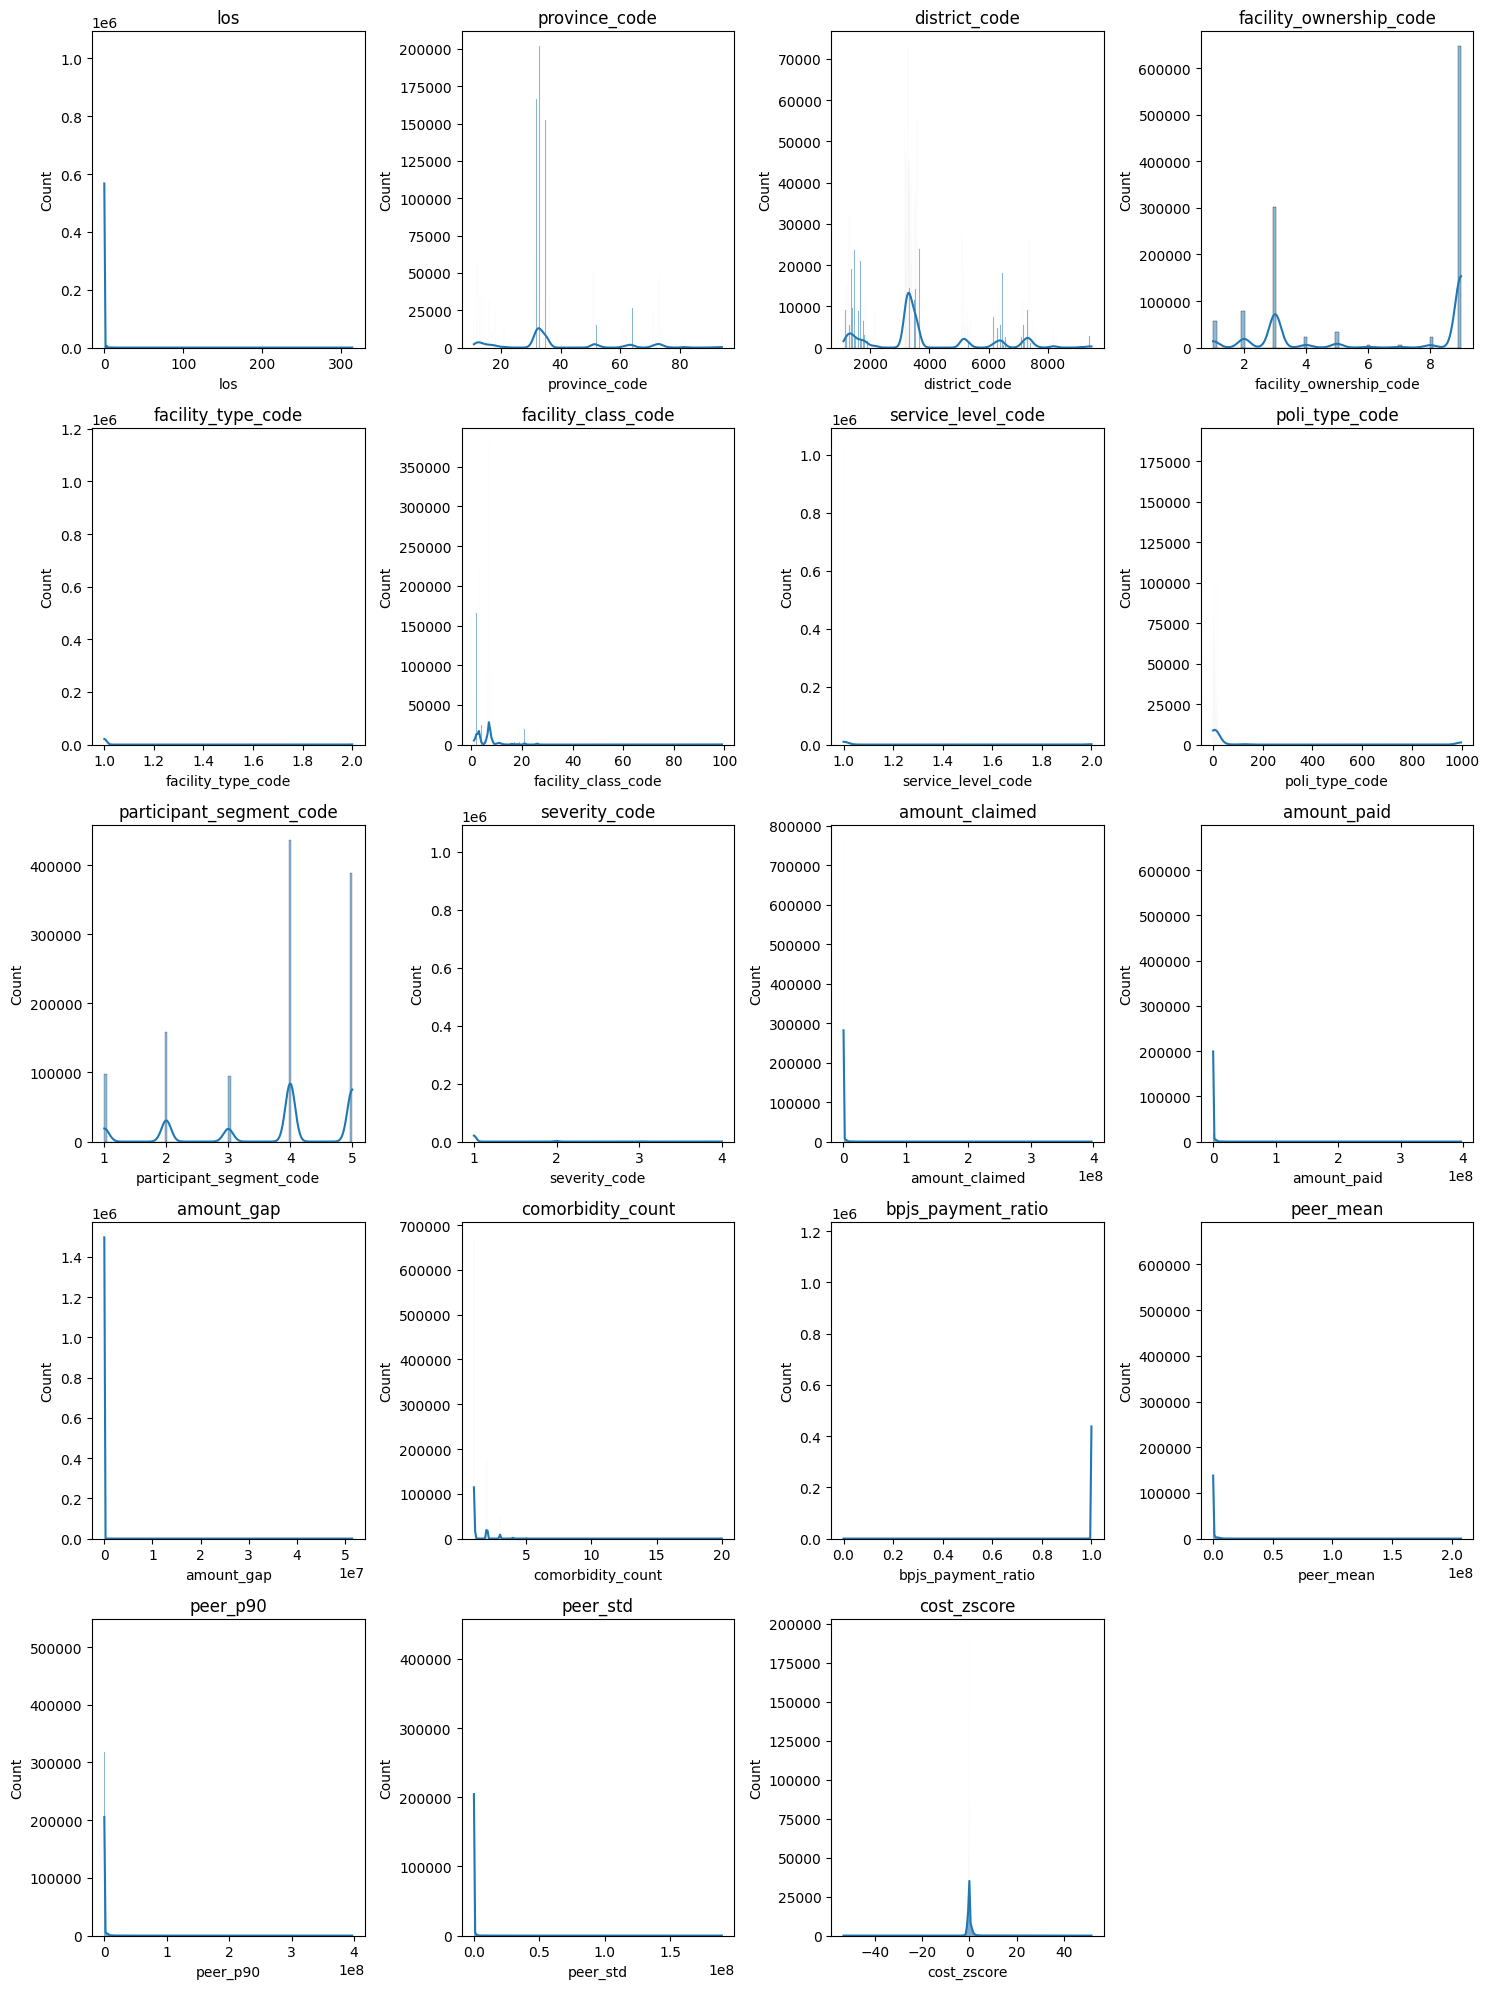

In [21]:
# Select only numerical columns for visualization
numerical_cols = df.select_dtypes(include=np.number).columns

# Create histograms and density plots for numerical columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

# Pre-processing

In [22]:
import yaml

feature_config_path = PROJECT_ROOT / 'ml/training/config/features.yaml'
with feature_config_path.open() as f:
    feature_config = yaml.safe_load(f)

numeric_features = feature_config.get('numeric_features', [])
categorical_features = feature_config.get('categorical_features', [])

print(f'Jumlah fitur numerik     : {len(numeric_features)}')
print(f'Jumlah fitur kategorikal : {len(categorical_features)}')
print('Contoh fitur numerik    :', numeric_features[:5])
print('Contoh fitur kategorikal:', categorical_features[:5])


Jumlah fitur numerik     : 8
Jumlah fitur kategorikal : 4
Contoh fitur numerik    : ['los', 'amount_claimed', 'amount_paid', 'amount_gap', 'comorbidity_count']
Contoh fitur kategorikal: ['severity_group', 'facility_class', 'province_name', 'service_type']


In [23]:
from sklearn.preprocessing import StandardScaler

df_features = df.copy()
df_features['comorbidity_count'] = df_features['comorbidity_count'].fillna(0)
df_features['cost_zscore'] = df_features['cost_zscore'].fillna(0)

X_num = df_features[numeric_features].fillna(0)
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    columns=numeric_features,
    index=df_features.index,
)

X_cat = pd.get_dummies(
    df_features[categorical_features].fillna('UNK'),
    columns=categorical_features,
    drop_first=False,
)

X = pd.concat([X_num_scaled, X_cat], axis=1)
feature_columns = X.columns.tolist()

print(f'Total kolom fitur setelah encoding: {len(feature_columns)}')
X.head()


Total kolom fitur setelah encoding: 72


,los,amount_claimed,amount_paid,amount_gap,comorbidity_count,peer_mean,peer_p90,cost_zscore,severity_group_berat,severity_group_fatal,...,province_name_SULAWESI BARAT,province_name_SULAWESI SELATAN,province_name_SULAWESI TENGAH,province_name_SULAWESI TENGGARA,province_name_SULAWESI UTARA,province_name_SUMATERA BARAT,province_name_SUMATERA SELATAN,province_name_SUMATERA UTARA,service_type_RITL,service_type_RJTL
0,-0.230169,-0.244280,-0.244327,-0.009122,-0.087932,-0.258959,-0.241474,-0.292704,False,False,...,False,False,False,False,False,False,False,False,False,True
1,-0.230169,-0.244280,-0.244327,-0.009122,-0.087932,-0.258959,-0.241474,-0.292704,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-0.230169,-0.211320,-0.211308,-0.009122,-0.087932,-0.258959,-0.241474,0.890796,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-0.230169,-0.263534,-0.263615,-0.009122,-0.087932,-0.280967,-0.250212,-0.483156,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.230169,-0.263534,-0.263615,-0.009122,-0.087932,-0.280967,-0.250212,-0.483156,False,False,...,False,False,False,False,False,False,False,False,False,True


In [24]:
from sklearn.ensemble import IsolationForest
import numpy as np

MODEL_NAME = 'isolation_forest'
MODEL_VERSION = 'iso_v2'

model = IsolationForest(
    n_estimators=200,
    contamination=0.03,
    random_state=42,
)
model.fit(X)

raw_scores = -model.decision_function(X)
df_scores = df[['claim_id']].copy()
df_scores['ml_score'] = raw_scores

min_score, max_score = df_scores['ml_score'].min(), df_scores['ml_score'].max()
df_scores['ml_score_normalized'] = (df_scores['ml_score'] - min_score) / (max_score - min_score + 1e-8)
df_scores['model_version'] = MODEL_VERSION

top_claims = df_scores.nlargest(10, 'ml_score').merge(
    df[['claim_id', 'amount_claimed', 'los', 'cost_zscore', 'province_name', 'severity_group']],
    on='claim_id',
    how='left'
)

display(df_scores.head())
display(top_claims)


,claim_id,ml_score,ml_score_normalized,model_version
0,81870922V001079,-0.097769,0.139627,iso_v2
1,81870922V001096,-0.097769,0.139627,iso_v2
2,81871022V000071,-0.093488,0.155257,iso_v2
3,81871022V000077,-0.095100,0.149373,iso_v2
4,81871022V000082,-0.095100,0.149373,iso_v2


,claim_id,ml_score,ml_score_normalized,model_version,amount_claimed,los,cost_zscore,province_name,severity_group
0,132761122V006784,0.137892,1.000000,iso_v2,98609500.0,31,2.234911,SULAWESI UTARA,fatal
1,318510322V002489,0.136857,0.996223,iso_v2,179036200.0,40,1.000000,DKI JAKARTA,fatal
2,318510222V000759,0.136454,0.994750,iso_v2,166878200.0,14,1.000000,DKI JAKARTA,fatal
3,315950222V006708,0.135537,0.991401,iso_v2,207675700.0,20,1.731231,JAWA TENGAH,fatal
4,315950622V015309,0.135537,0.991401,iso_v2,154455200.0,30,1.974034,JAWA TENGAH,fatal
5,318510622V004199,0.134323,0.986970,iso_v2,106195800.0,26,1.730418,DKI JAKARTA,berat
6,315951221V041712,0.133887,0.985380,iso_v2,60165000.0,19,1.943638,JAWA TENGAH,fatal
7,318510122V001246,0.133805,0.985077,iso_v2,166878200.0,27,NaN,DKI JAKARTA,fatal
8,374311122V007618,0.133516,0.984023,iso_v2,148339800.0,22,1.731111,DKI JAKARTA,fatal
9,8990722V023948,0.133433,0.983721,iso_v2,153220100.0,37,1.000000,SULAWESI UTARA,berat


In [25]:
import numpy as np

top_pct = 0.03
threshold = np.quantile(df_scores['ml_score'], 1 - top_pct)
top_mask = df_scores['ml_score'] >= threshold
top_sample = df[top_mask].copy()

print('Ringkasan skor ML:')
display(df_scores['ml_score'].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))

print(f'Batas skor untuk Top {top_pct*100:.1f}%: {threshold:.4f}')
print(f'Jumlah klaim Top {top_pct*100:.1f}%: {top_sample.shape[0]:,}')

overall_amount = df['amount_claimed'].mean()
top_amount = top_sample['amount_claimed'].mean() if not top_sample.empty else float('nan')
overall_z = df['cost_zscore'].mean()
top_z = top_sample['cost_zscore'].mean() if not top_sample.empty else float('nan')
overall_short_los = (df['los'] <= 1).mean()
top_short_los = (top_sample['los'] <= 1).mean() if not top_sample.empty else float('nan')

print(f'Rata-rata amount_claimed keseluruhan : {overall_amount:,.0f}')
print(f'Rata-rata amount_claimed Top {top_pct*100:.1f}% : {top_amount:,.0f}')
print(f'Rata-rata cost_zscore keseluruhan     : {overall_z:.2f}')
print(f'Rata-rata cost_zscore Top {top_pct*100:.1f}%     : {top_z:.2f}')
print(f'Proporsi LOS<=1 keseluruhan            : {overall_short_los:.3f}')
print(f'Proporsi LOS<=1 Top {top_pct*100:.1f}%            : {top_short_los:.3f}')


Ringkasan skor ML:


count    1.176438e+06
mean    -1.003736e-01
std      3.629045e-02
min     -1.360138e-01
50%     -1.113857e-01
90%     -3.771980e-02
95%     -1.486485e-02
99%      3.275960e-02
max      1.378920e-01
Name: ml_score, dtype: float64

Batas skor untuk Top 3.0%: -0.0000
Jumlah klaim Top 3.0%: 35,294
Rata-rata amount_claimed keseluruhan : 867,679
Rata-rata amount_claimed Top 3.0% : 9,797,548
Rata-rata cost_zscore keseluruhan     : -0.00
Rata-rata cost_zscore Top 3.0%     : 0.21
Proporsi LOS<=1 keseluruhan            : 0.904
Proporsi LOS<=1 Top 3.0%            : 0.104


In [26]:
import json
from datetime import datetime
import joblib

artifact_dir = PROJECT_ROOT / 'ml/artifacts'
artifact_dir.mkdir(parents=True, exist_ok=True)

model_path = artifact_dir / f'{MODEL_NAME}_{MODEL_VERSION}.pkl'
scaler_path = artifact_dir / f'scaler_{MODEL_VERSION}.pkl'
feature_columns_path = artifact_dir / 'feature_columns.json'
meta_path = artifact_dir / 'model_meta.json'

joblib.dump(model, model_path)
joblib.dump(scaler, scaler_path)
pd.Series(feature_columns).to_json(feature_columns_path, orient='values')

model_meta = {
    'model_name': MODEL_NAME,
    'model_version': MODEL_VERSION,
    'trained_on': 'claims_normalized',
    'train_rows': int(len(df)),
    'contamination': 0.03,
    'numeric_features': numeric_features,
    'categorical_features': categorical_features,
    'feature_columns': feature_columns,
    'prepared_by': '<nama>',
    'train_timestamp': datetime.utcnow().isoformat() + 'Z',
    'colab_notebook': 'deteksi_anomali_unsupervised.ipynb',
}

with meta_path.open('w') as f:
    json.dump(model_meta, f, indent=2)

print(f'Model disimpan ke {model_path}')
print(f'Scaler disimpan ke {scaler_path}')
print(f'Daftar kolom disimpan ke {feature_columns_path}')
print(f'Metadata disimpan ke {meta_path}')


Model disimpan ke /Users/ridomaulana/bpjs/ml/artifacts/isolation_forest_iso_v2.pkl
Scaler disimpan ke /Users/ridomaulana/bpjs/ml/artifacts/scaler_iso_v2.pkl
Daftar kolom disimpan ke /Users/ridomaulana/bpjs/ml/artifacts/feature_columns.json
Metadata disimpan ke /Users/ridomaulana/bpjs/ml/artifacts/model_meta.json


/var/folders/tm/w79ln4vn3kv1l5nccfl_1zgr0000gn/T/ipykernel_40947/891649886.py:27: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  'train_timestamp': datetime.utcnow().isoformat() + 'Z',
